In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("../Support Vector Machine/IRIS.csv")

In [23]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualization

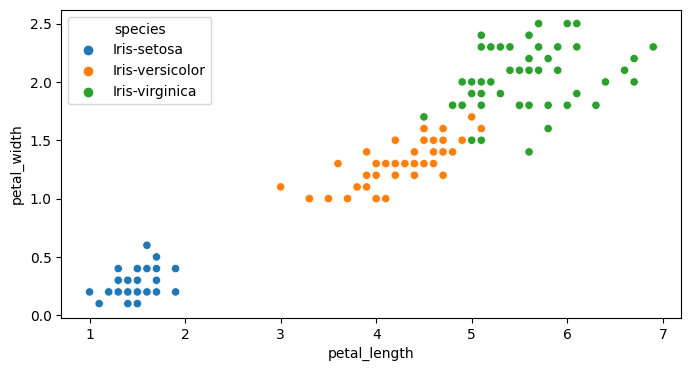

In [24]:
fig, axes = plt.subplots(figsize=(8,4))

sns.scatterplot(x=df["petal_length"], y=df["petal_width"], hue=df["species"], ax=axes)
plt.show()

In [25]:
# drop unnecessary columns
n_df = df.drop(columns=["species","sepal_length","sepal_width"])

In [26]:
n_df.head(5)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# KMeans Clustring

In [47]:
# without scaling the dataset
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

In [48]:
km

KMeans(n_clusters=3)

In [49]:
km.fit(n_df)

C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [50]:
pred = km.predict(n_df)

In [51]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
n_df["target_species"] = pred

In [53]:
n_df.head(5)

,petal_length,petal_width,target_species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [54]:
n_df["target_species"].unique()

array([0, 2, 1])

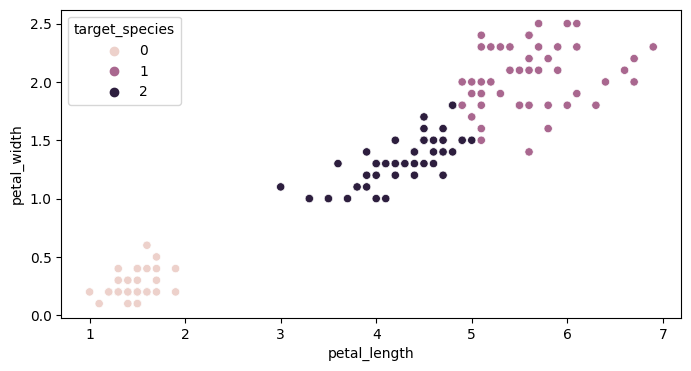

In [55]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=n_df["petal_length"], y=n_df["petal_width"], hue=n_df["target_species"])
plt.show()

# Min Max Scaler

In [129]:
n_df2 = df.drop(columns=["sepal_length","sepal_width","species"])
n_df2.head(5)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

new_df = scaler.fit_transform(n_df2)
new_df = pd.DataFrame(new_df, columns=n_df2.columns)
new_df

,petal_length,petal_width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [131]:
# building model after scaling the dataset 
kn_means = KMeans(n_clusters=3)

kn_means.fit(new_df)
pred = kn_means.predict(new_df)
pred

C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [132]:
new_df["target_species"] = pred

In [133]:
new_df

,petal_length,petal_width,target_species
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [134]:
kn_means.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07864407, 0.06      ],
       [0.55867014, 0.51041667]])

In [135]:
# scaler_clusters = MinMaxScaler()
# transform = scaler_clusters.fit_transform(kn_means.cluster_centers_)
# cluster_centroid = pd.DataFrame(transform, columns=["x","y"])
# cluster_centroid

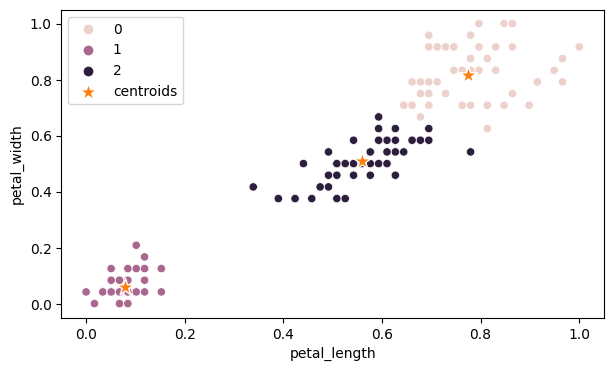

In [136]:
fig, axes = plt.subplots(ncols=1, figsize=(7,4))

sns.scatterplot(x=new_df["petal_length"], y=new_df["petal_width"], hue=new_df["target_species"], ax=axes)
sns.scatterplot(x=kn_means.cluster_centers_[:,0], y=kn_means.cluster_centers_[:,1], s=170, marker="*", label="centroids", ax=axes)
plt.show()

# Elbow method to set best value of 'n_clusters'

In [140]:
k_range = range(1,11)
sse = []
for i in k_range:
    kn_meanss = KMeans(n_clusters=i)
    kn_meanss.fit(df[["petal_length","petal_width"]])
    sse.append(kn_meanss.inertia_)

C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: 

In [141]:
sse

[550.6434666666668,
 86.40394533571002,
 31.387758974358984,
 19.48238901098901,
 13.93330875790876,
 11.067828739411807,
 9.225957208237986,
 7.732738763575607,
 6.4728945414063075,
 5.630218957655019]

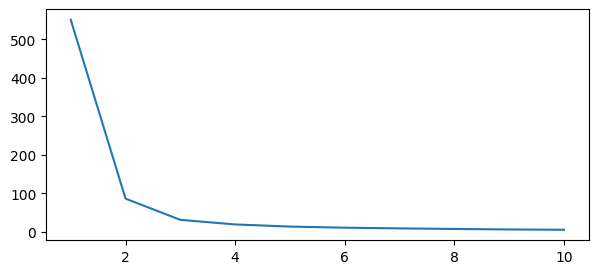

In [144]:
plt.figure(figsize=(7,3))
sns.lineplot(x=k_range, y=sse)
plt.show()

### Here There is confusion between 2 and 3 because two classes are rearlly near to each other.